# Import Modules

In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
# Define the local file path
file_path_recipes = 'recipes.csv'
file_path_reviews = 'reviews.csv'

# Load the data into a DataFrame
recipes = pd.read_csv(file_path_recipes)
reviews = pd.read_csv(file_path_reviews)

# Display the DataFrame
print(recipes.head())
print(reviews.head())

   RecipeId                               Name  AuthorId      AuthorName  \
0        38  Low-Fat Berry Blue Frozen Dessert      1533          Dancer   
1        39                            Biryani      1567        elly9812   
2        40                      Best Lemonade      1566  Stephen Little   
3        41     Carina's Tofu-Vegetable Kebabs      1586         Cyclopz   
4        42                       Cabbage Soup      1538       Duckie067   

  CookTime PrepTime TotalTime         DatePublished  \
0    PT24H    PT45M  PT24H45M  1999-08-09T21:46:00Z   
1    PT25M     PT4H   PT4H25M  1999-08-29T13:12:00Z   
2     PT5M    PT30M     PT35M  1999-09-05T19:52:00Z   
3    PT20M    PT24H  PT24H20M  1999-09-03T14:54:00Z   
4    PT30M    PT20M     PT50M  1999-09-19T06:19:00Z   

                                         Description  \
0  Make and share this Low-Fat Berry Blue Frozen ...   
1  Make and share this Biryani recipe from Food.com.   
2  This is from one of my  first Good House 

# Data Analysis

In [3]:
print(recipes.tail())

        RecipeId                                              Name  \
522512    541379                    Meg's Fresh Ginger Gingerbread   
522513    541380  Roast Prime Rib au Poivre with Mixed Peppercorns   
522514    541381                             Kirshwasser Ice Cream   
522515    541382          Quick & Easy Asian Cucumber Salmon Rolls   
522516    541383                           Spicy Baked Scotch Eggs   

          AuthorId    AuthorName CookTime PrepTime TotalTime  \
522512  2002090414         rdsxc    PT35M     PT1H   PT1H35M   
522513      211566  Denver cooks     PT3H    PT30M   PT3H30M   
522514  2001131545   Jonathan F.     PT3H     PT1H      PT4H   
522515  2001004241     CLUBFOODY      NaN    PT15M     PT15M   
522516      188099  Chef LauraMD    PT25M    PT15M     PT40M   

               DatePublished  \
522512  2020-12-22T15:27:00Z   
522513  2020-12-22T15:32:00Z   
522514  2020-12-22T15:33:00Z   
522515  2020-12-22T22:11:00Z   
522516  2020-12-22T22:12:00Z   

 

In [4]:
print(recipes.describe())

            RecipeId      AuthorId  AggregatedRating    ReviewCount  \
count  522517.000000  5.225170e+05     269294.000000  275028.000000   
mean   271821.436970  4.572585e+07          4.632014       5.227784   
std    155495.878422  2.929714e+08          0.641934      20.381347   
min        38.000000  2.700000e+01          1.000000       1.000000   
25%    137206.000000  6.947400e+04          4.500000       1.000000   
50%    271758.000000  2.389370e+05          5.000000       2.000000   
75%    406145.000000  5.658280e+05          5.000000       4.000000   
max    541383.000000  2.002886e+09          5.000000    3063.000000   

            Calories     FatContent  SaturatedFatContent  CholesterolContent  \
count  522517.000000  522517.000000        522517.000000       522517.000000   
mean      484.438580      24.614922             9.559457           86.487003   
std      1397.116649     111.485798            46.622621          301.987009   
min         0.000000       0.000000     

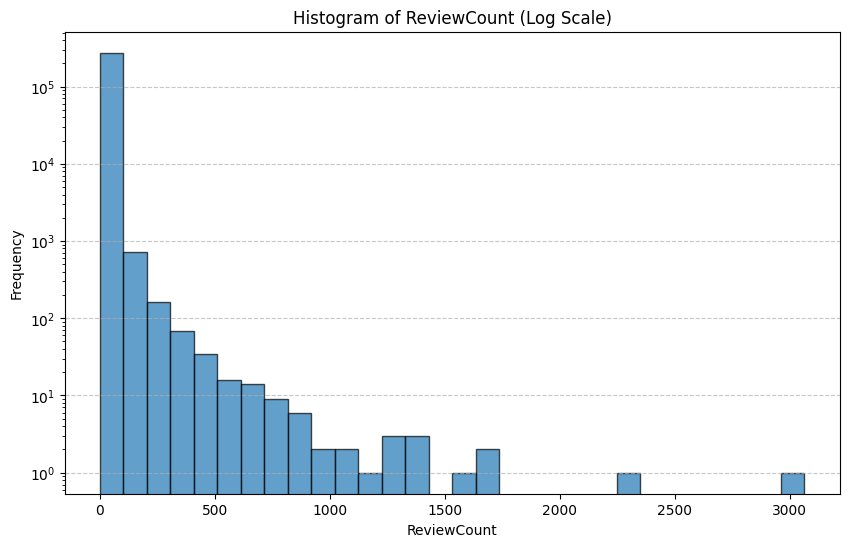

In [5]:


# Plot the histogram of the ReviewCount column on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(recipes['ReviewCount'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.title('Histogram of ReviewCount (Log Scale)')
plt.xlabel('ReviewCount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



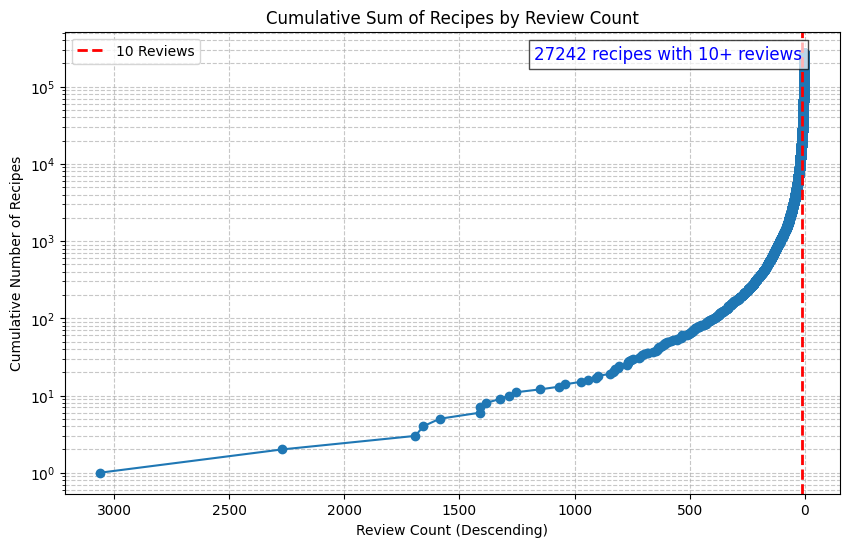

In [6]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the ReviewCount column in descending order
sorted_df = recipes.sort_values(by='ReviewCount', ascending=False)

# Compute the cumulative count of RecipeId
sorted_df['CumulativeRecipes'] = sorted_df['RecipeId'].expanding().count()

# Count the number of recipes with 10 or more reviews
count_10_or_more = (sorted_df['ReviewCount'] >= 10).sum()

# Plot the cumulative sum of recipes against the ReviewCount with reversed x-axis
plt.figure(figsize=(10, 6))
plt.plot(sorted_df['ReviewCount'], sorted_df['CumulativeRecipes'], marker='o', linestyle='-')
plt.xlabel('Review Count (Descending)')
plt.ylabel('Cumulative Number of Recipes')
plt.title('Cumulative Sum of Recipes by Review Count')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.gca().invert_xaxis()  # Invert the x-axis to go from high to low review count

# Add a vertical line at 10 reviews
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='10 Reviews')

# Annotate the number of recipes with 10 or more reviews
plt.text(10, sorted_df['CumulativeRecipes'].max() / 2, 
         f'{count_10_or_more} recipes with 10+ reviews', 
         color='blue', fontsize=12, ha='right', va='center', 
         bbox=dict(facecolor='white', alpha=0.7))

# Add a legend
plt.legend()

plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()



Weighted rating attempt below:

In [7]:
import pandas as pd

# Assuming the reviews DataFrame is already loaded as 'reviews' from the earlier code
# Define the weight mapping for each rating
weight_mapping = {
    5: 4,
    4: 5,
    3: 6,
    2: 4,
    1: 3,
    0: 2
}

# Calculate the total points and the weighted count for each RecipeId
def calculate_weighted_score(group):
    total_points = sum(rating * count * weight_mapping[rating] for rating, count in group['Rating'].value_counts().items())
    weighted_sum = sum(count * weight_mapping[rating] for rating, count in group['Rating'].value_counts().items())
    return total_points / weighted_sum if weighted_sum != 0 else 0

# Apply the calculation to each RecipeId group
weighted_ratings = reviews.groupby('RecipeId').apply(calculate_weighted_score).reset_index(name='WeightedAverageRating')

# Display or further use the resulting DataFrame
print(weighted_ratings)

# Optionally, replace the existing average rating column in the recipes DataFrame if you have one
# Assuming you have a DataFrame called recipes where you need to update the ratings
recipes = recipes.merge(weighted_ratings, on='RecipeId', how='left')
recipes['AverageRating'] = recipes['WeightedAverageRating']

# Display the updated recipes DataFrame
print(recipes.head())



/var/folders/zd/cww5hp2j0cj1n_8kn3hnh9c00000gn/T/ipykernel_76010/1337515811.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_ratings = reviews.groupby('RecipeId').apply(calculate_weighted_score).reset_index(name='WeightedAverageRating')


        RecipeId  WeightedAverageRating
0             38               4.210526
1             39               3.000000
2             40               4.405405
3             41               4.444444
4             42               3.212121
...          ...                    ...
271673    540899               5.000000
271674    541001               0.000000
271675    541030               5.000000
271676    541195               5.000000
271677    541298               5.000000

[271678 rows x 2 columns]
   RecipeId                               Name  AuthorId      AuthorName  \
0        38  Low-Fat Berry Blue Frozen Dessert      1533          Dancer   
1        39                            Biryani      1567        elly9812   
2        40                      Best Lemonade      1566  Stephen Little   
3        41     Carina's Tofu-Vegetable Kebabs      1586         Cyclopz   
4        42                       Cabbage Soup      1538       Duckie067   

  CookTime PrepTime TotalTime       

Distribution of weighted rating scores based on number of reviews:

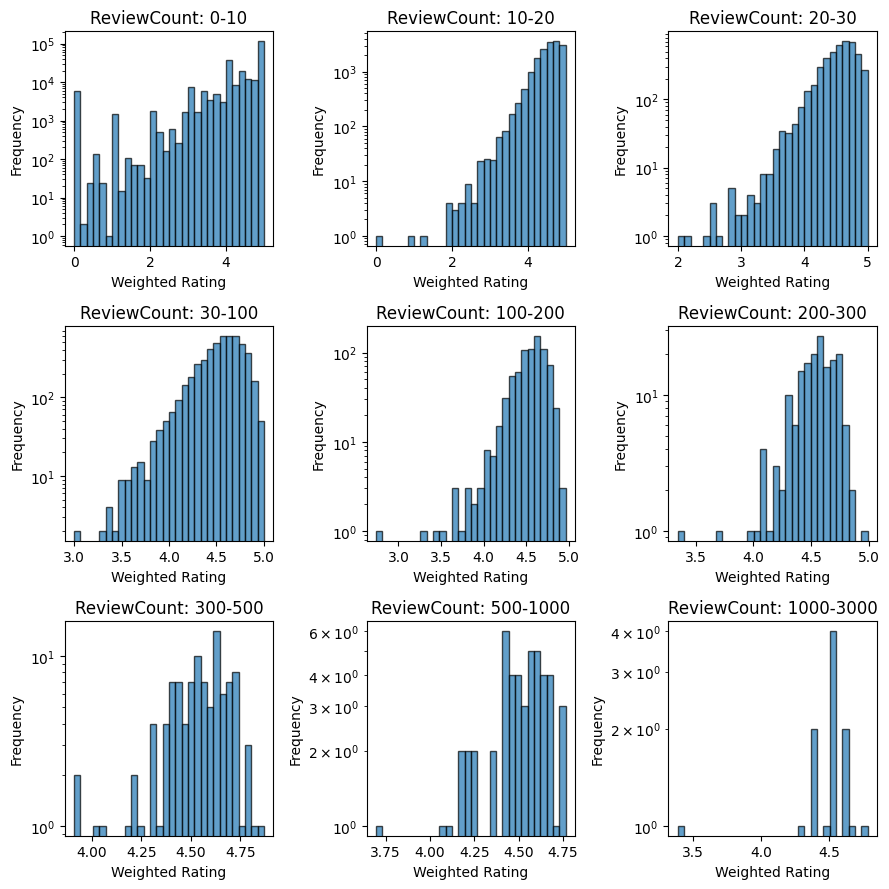

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'recipes' DataFrame already contains the new 'WeightedAverageRating' column
# Define the ranges for ReviewCount
ranges = [
    (0, 10), (10, 20), (20, 30), (30, 100),
    (100, 200), (200, 300), (300, 500), (500, 1000), (1000, 3000)
]

# Create the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, (lower, upper) in zip(axes, ranges):
    # Filter the DataFrame for the current range
    df_filtered = recipes[(recipes['ReviewCount'] >= lower) & (recipes['ReviewCount'] < upper)]
    
    # Plot the histogram of weighted ratings
    ax.hist(df_filtered['WeightedAverageRating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_yscale('log')  # Set the y-axis to logarithmic scale
    ax.set_title(f'ReviewCount: {lower}-{upper}')
    ax.set_xlabel('Weighted Rating')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


I left the original ones in as well:

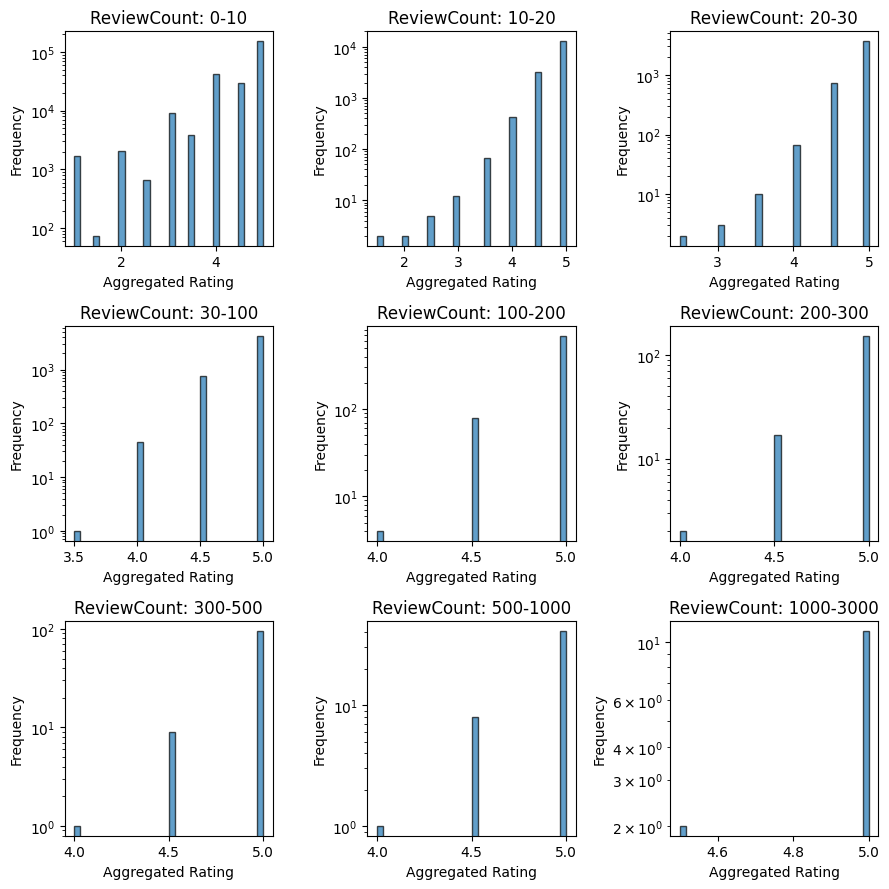

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'recipes' DataFrame already exists
# Define the ranges for ReviewCount
ranges = [
    (0, 10), (10, 20), (20, 30), (30, 100),
    (100, 200), (200, 300), (300, 500), (500, 1000), (1000, 3000)
]

# Create the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, (lower, upper) in zip(axes, ranges):
    # Filter the DataFrame for the current range
    df_filtered = recipes[(recipes['ReviewCount'] >= lower) & (recipes['ReviewCount'] < upper)]

    # Plot the histogram of aggregated ratings
    ax.hist(df_filtered['AggregatedRating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_yscale('log')  # Set the y-axis to logarithmic scale
    ax.set_title(f'ReviewCount: {lower}-{upper}')
    ax.set_xlabel('Aggregated Rating')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



Distribution of weighted ratings based on number of reviews 1 through 9:

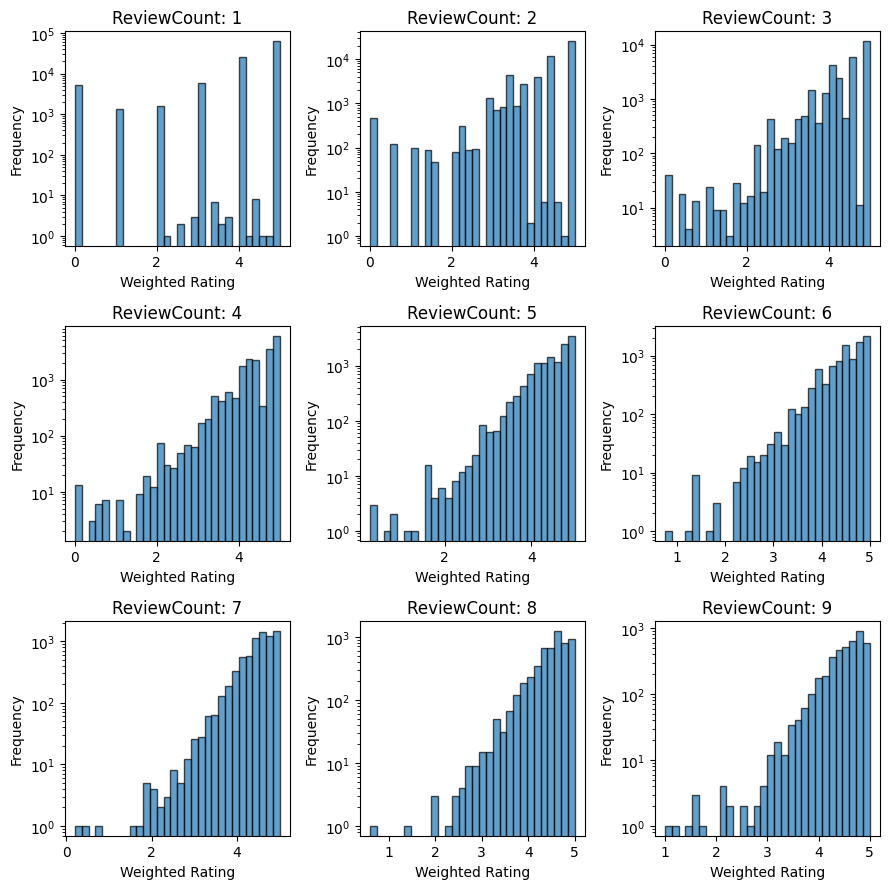

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'recipes' DataFrame already contains the new 'WeightedAverageRating' column
# Define the individual ranges for ReviewCount from 1 to 9
ranges = [
    (1, 1), (2, 2), (3, 3), (4, 4),
    (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)
]

# Create the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, (lower, upper) in zip(axes, ranges):
    # Filter the DataFrame for the current range (only exact values from 1 to 9)
    df_filtered = recipes[recipes['ReviewCount'] == lower]
    
    # Plot the histogram of weighted ratings
    ax.hist(df_filtered['WeightedAverageRating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_yscale('log')  # Set the y-axis to logarithmic scale
    ax.set_title(f'ReviewCount: {lower}')
    ax.set_xlabel('Weighted Rating')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



I left the original one for this in here as well:

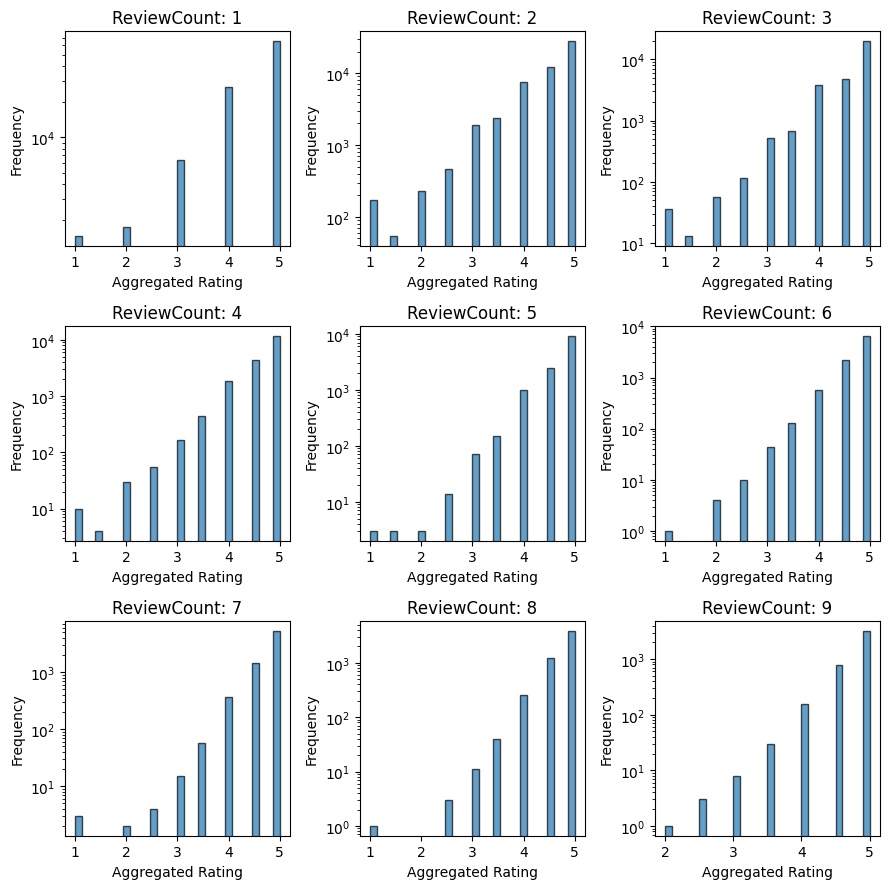

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'recipes' DataFrame already exists
# Define the ranges for ReviewCount
ranges = [
    (1, 2), (2, 3), (3, 4),(4, 5), (5, 6),
    (6, 7), (7, 8), (8, 9), (9,10)
]

# Create the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, (lower, upper) in zip(axes, ranges):
    # Filter the DataFrame for the current range
    df_filtered = recipes[(recipes['ReviewCount'] >= lower) & (recipes['ReviewCount'] < upper)]

    # Plot the histogram of aggregated ratings
    ax.hist(df_filtered['AggregatedRating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_yscale('log')  # Set the y-axis to logarithmic scale
    ax.set_title(f'ReviewCount: {lower}')
    ax.set_xlabel('Aggregated Rating')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Specify the columns to include in the pair plot
columns_to_plot = ['ReviewCount', 'AggregatedRating', 'Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent' ]

# Create the pair plot for the selected columns
sns.pairplot(recipes[columns_to_plot])

# Display the plot
plt.show()


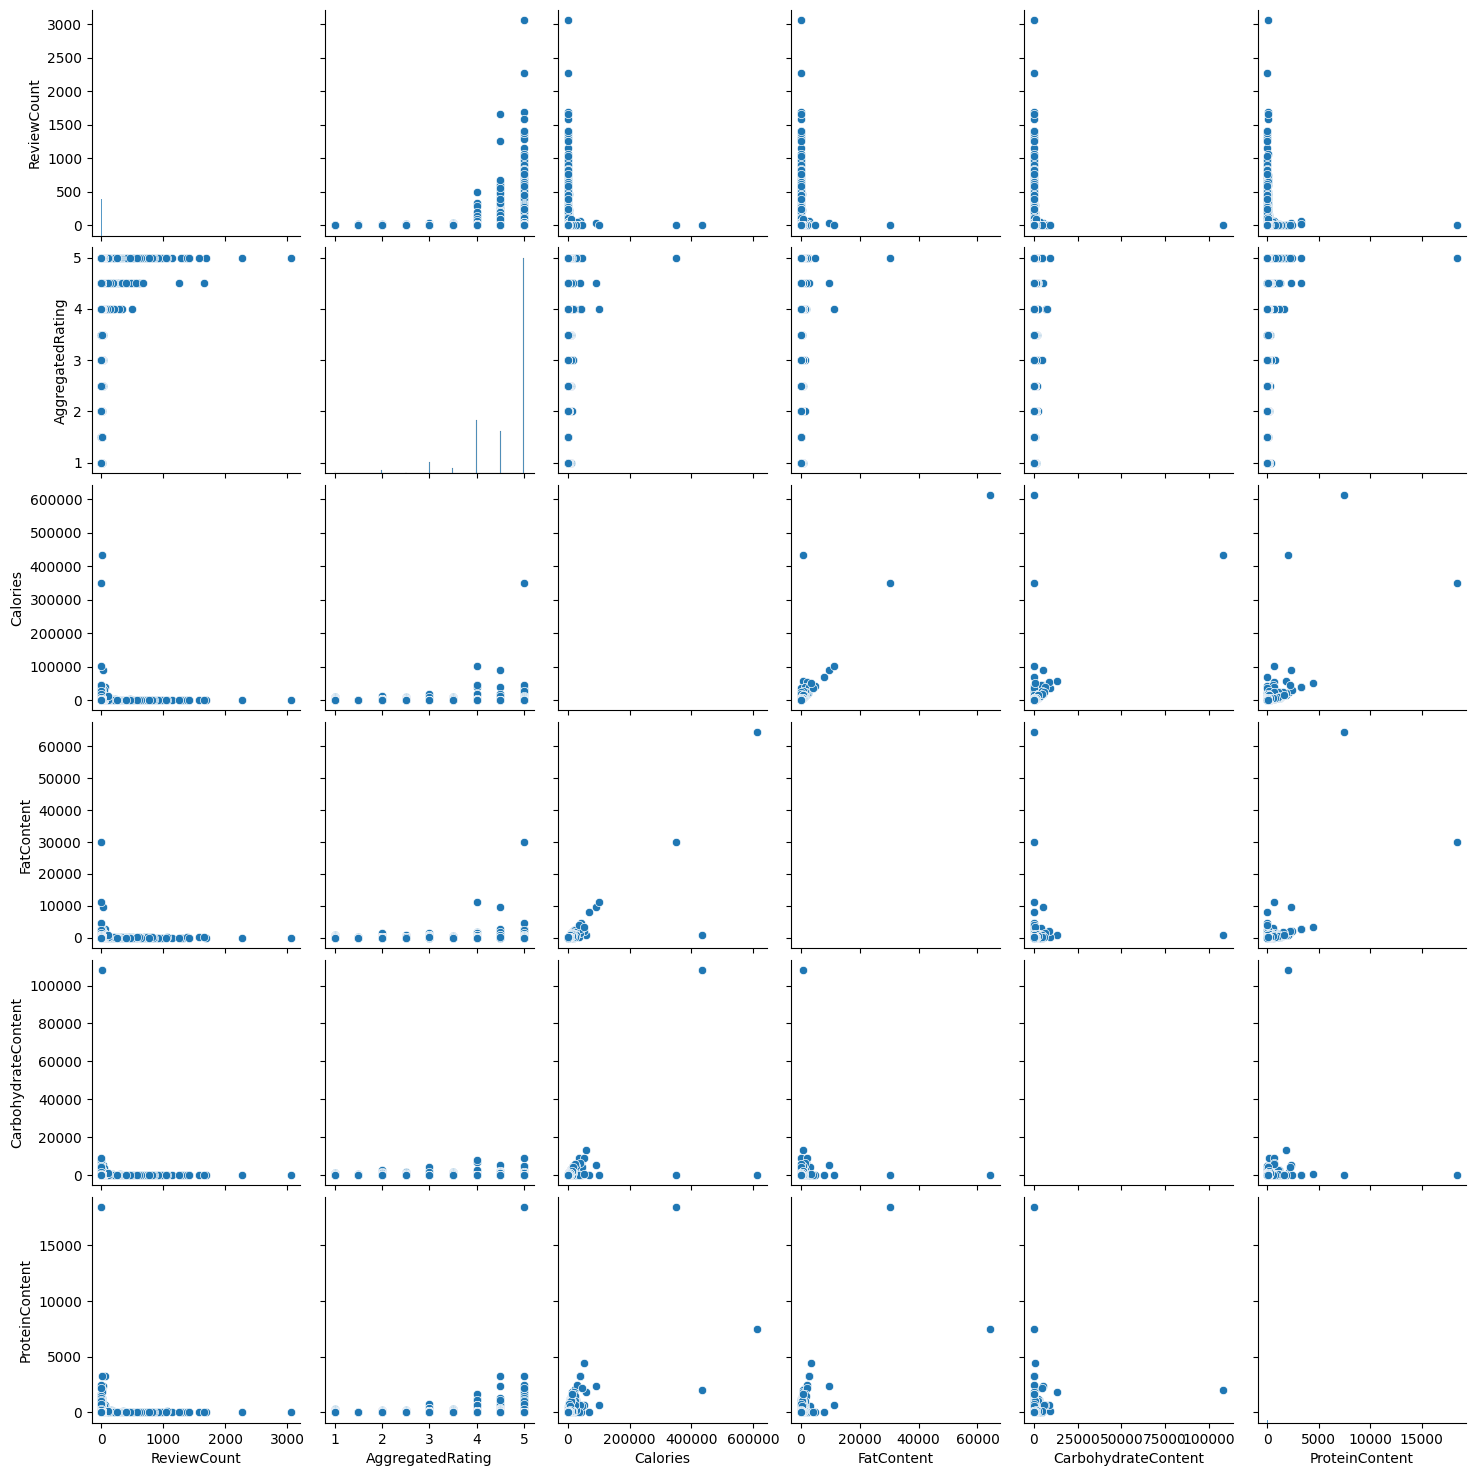

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Specify the columns to include in the pair plot
columns_to_plot = ['ReviewCount', 'AggregatedRating', 'Calories','FatContent','CarbohydrateContent','ProteinContent' ]

# Create the pair plot for the selected columns
sns.pairplot(recipes[columns_to_plot])

# Display the plot
plt.show()

In [ ]:
# Count how many images have content and are not 'character(0)'
valid_images_count = (recipes['Images'] != 'character(0)').sum()

print(f'The number of images with content: {valid_images_count}')


The number of images with content: 165897


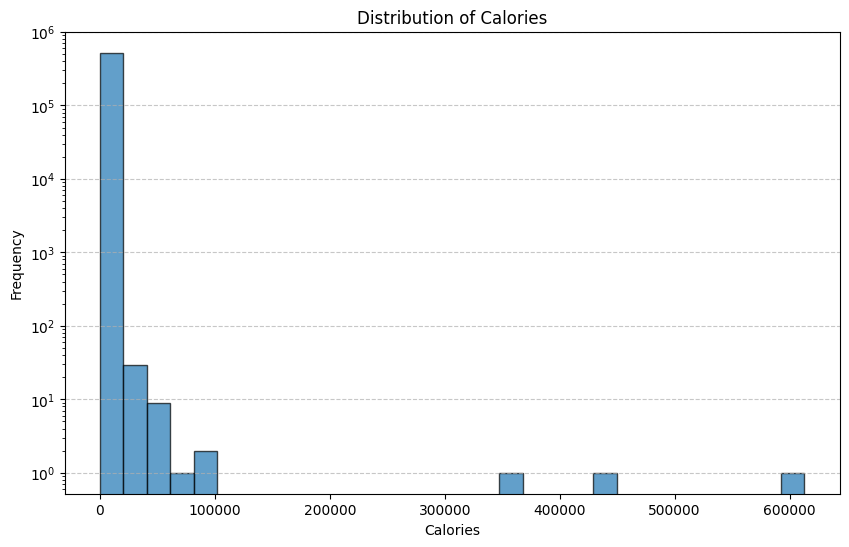

In [ ]:
# Plot the histogram of the Calories column with Y-axis on log scale
plt.figure(figsize=(10, 6))
plt.hist(recipes['Calories'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



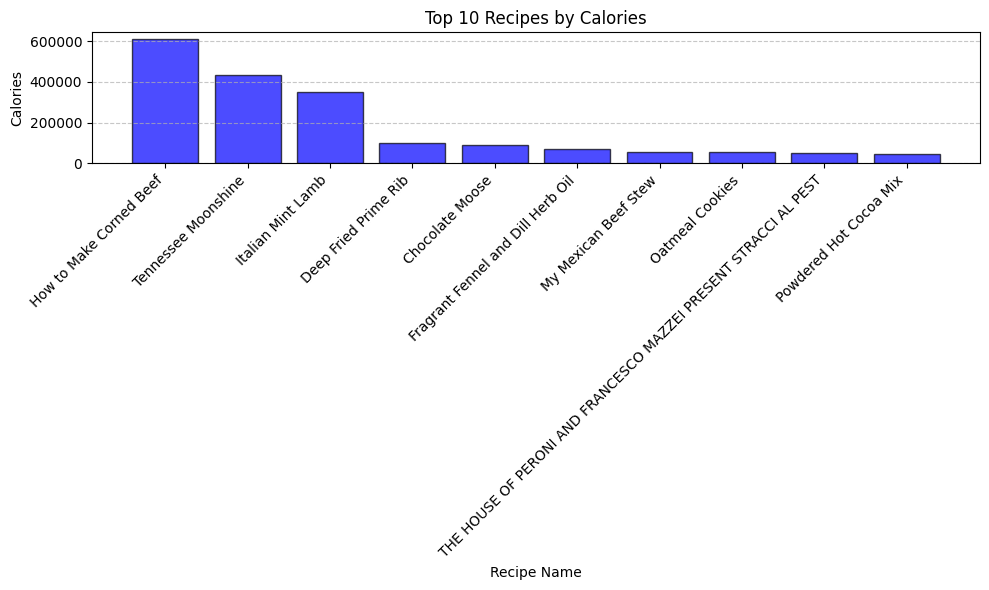

In [ ]:
# Sort the DataFrame by the Calories column in descending order
sorted_recipes = recipes.sort_values(by='Calories', ascending=False)

# Select the top 10 rows
top_10_recipes = sorted_recipes.head(10)

# Plot the top 10 rows
plt.figure(figsize=(10, 6))
plt.bar(top_10_recipes['Name'], top_10_recipes['Calories'], color='blue', edgecolor='k', alpha=0.7)
plt.ylabel('Calories')
plt.xlabel('Recipe Name')
plt.title('Top 10 Recipes by Calories')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Print all columns for the top 10 recipes 
print(top_10_recipes.to_string(index=False))

 RecipeId                                                             Name   AuthorId         AuthorName CookTime PrepTime TotalTime        DatePublished                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Description       Images   RecipeCategory                                                                                 Keywords                                                             RecipeIngredientQuantities                                                                                                                                            RecipeIngredientParts  AggregatedRati

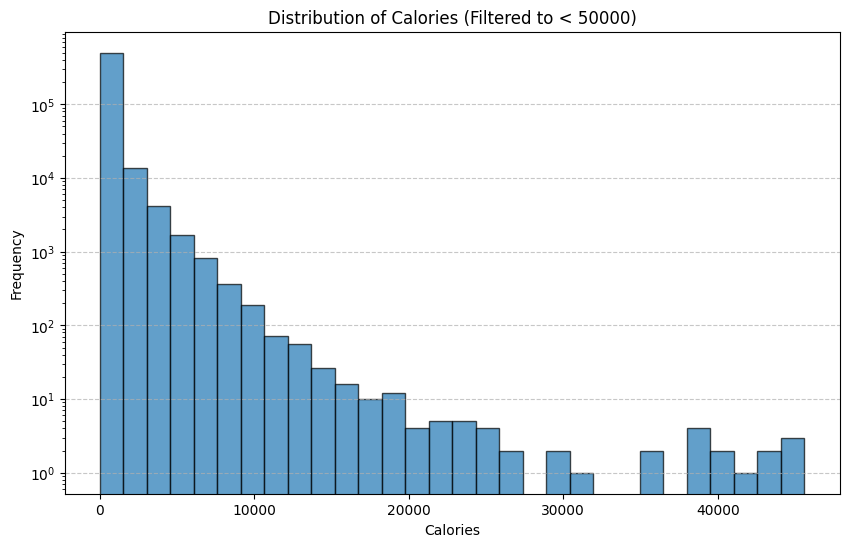

In [ ]:
# Filter the DataFrame to include only rows where Calories < 50000
filtered_recipes = recipes[recipes['Calories'] < 50000]

# Plot the histogram of the filtered Calories column with Y-axis on log scale
plt.figure(figsize=(10, 6))
plt.hist(filtered_recipes['Calories'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.title('Distribution of Calories (Filtered to < 50000)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


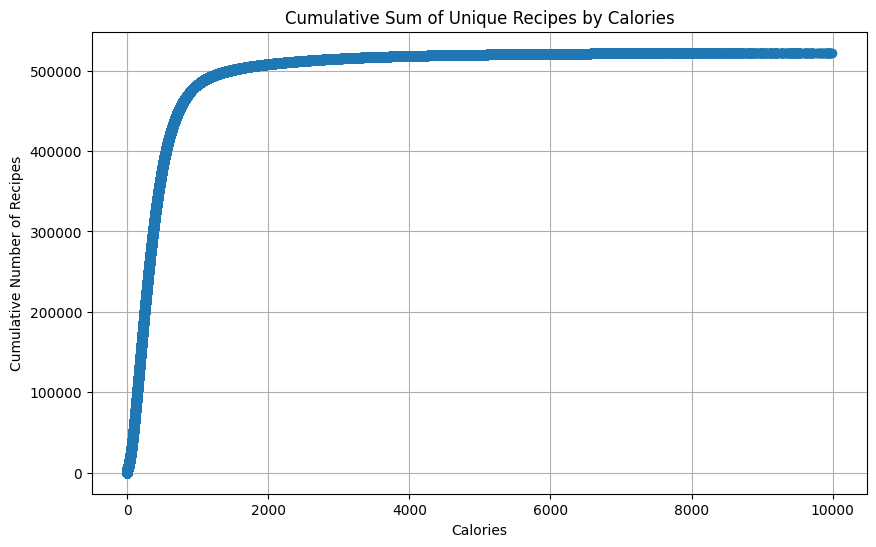

In [ ]:
# Filter the DataFrame to include only rows where Calories < 50000
filtered_recipes = recipes[recipes['Calories'] < 10000]

# Sort the DataFrame by the Calories column in ascending order
sorted_recipes = filtered_recipes.sort_values(by='Calories', ascending=True)

# Compute the cumulative count of unique RecipeId
sorted_recipes['CumulativeRecipes'] = sorted_recipes['RecipeId'].expanding().count()

# Plot the cumulative sum of recipes against the Calories
plt.figure(figsize=(10, 6))
plt.plot(sorted_recipes['Calories'], sorted_recipes['CumulativeRecipes'], marker='o', linestyle='-')
plt.xlabel('Calories')
plt.ylabel('Cumulative Number of Recipes')
plt.title('Cumulative Sum of Unique Recipes by Calories')
plt.grid(True)

# Show the plot
plt.show()


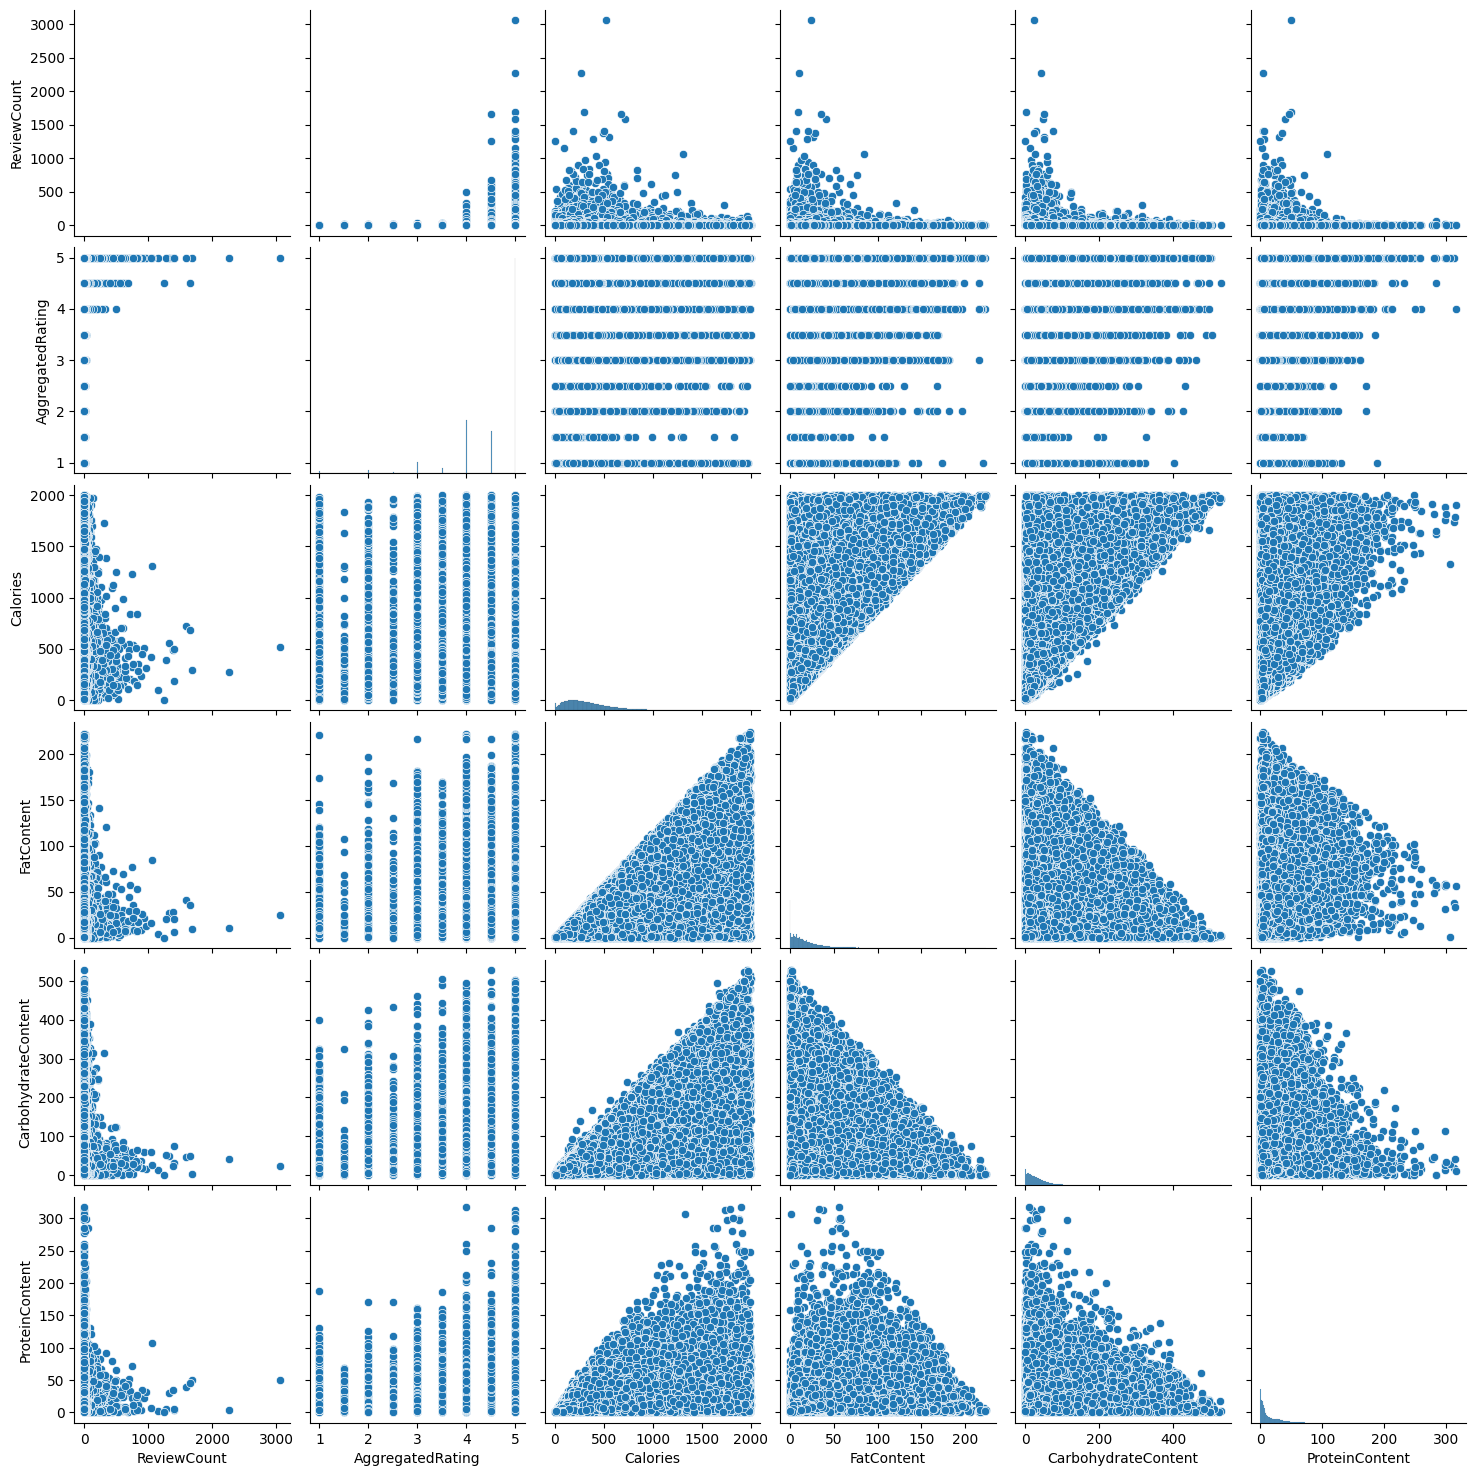

In [ ]:
filtered_recipes_2000 = recipes[recipes['Calories'] < 2000]

# Specify the columns to include in the pair plot
columns_to_plot = ['ReviewCount', 'AggregatedRating', 'Calories','FatContent','CarbohydrateContent','ProteinContent' ]

# Create the pair plot for the selected columns
sns.pairplot(filtered_recipes_2000[columns_to_plot])

# Display the plot
plt.show()

In [ ]:
# Print the unique values and their counts in the RecipeCategory column
recipe_category_counts = filtered_recipes_2000['RecipeCategory'].value_counts()

# Display the counts
print(recipe_category_counts)


RecipeCategory
Dessert              58343
Lunch/Snacks         32095
One Dish Meal        31112
Vegetable            27107
Breakfast            20934
                     ...  
Bread Pudding            1
Ham And Bean Soup        1
Peanut Butter Pie        1
Dairy Free Foods         1
Labor Day                1
Name: count, Length: 309, dtype: int64


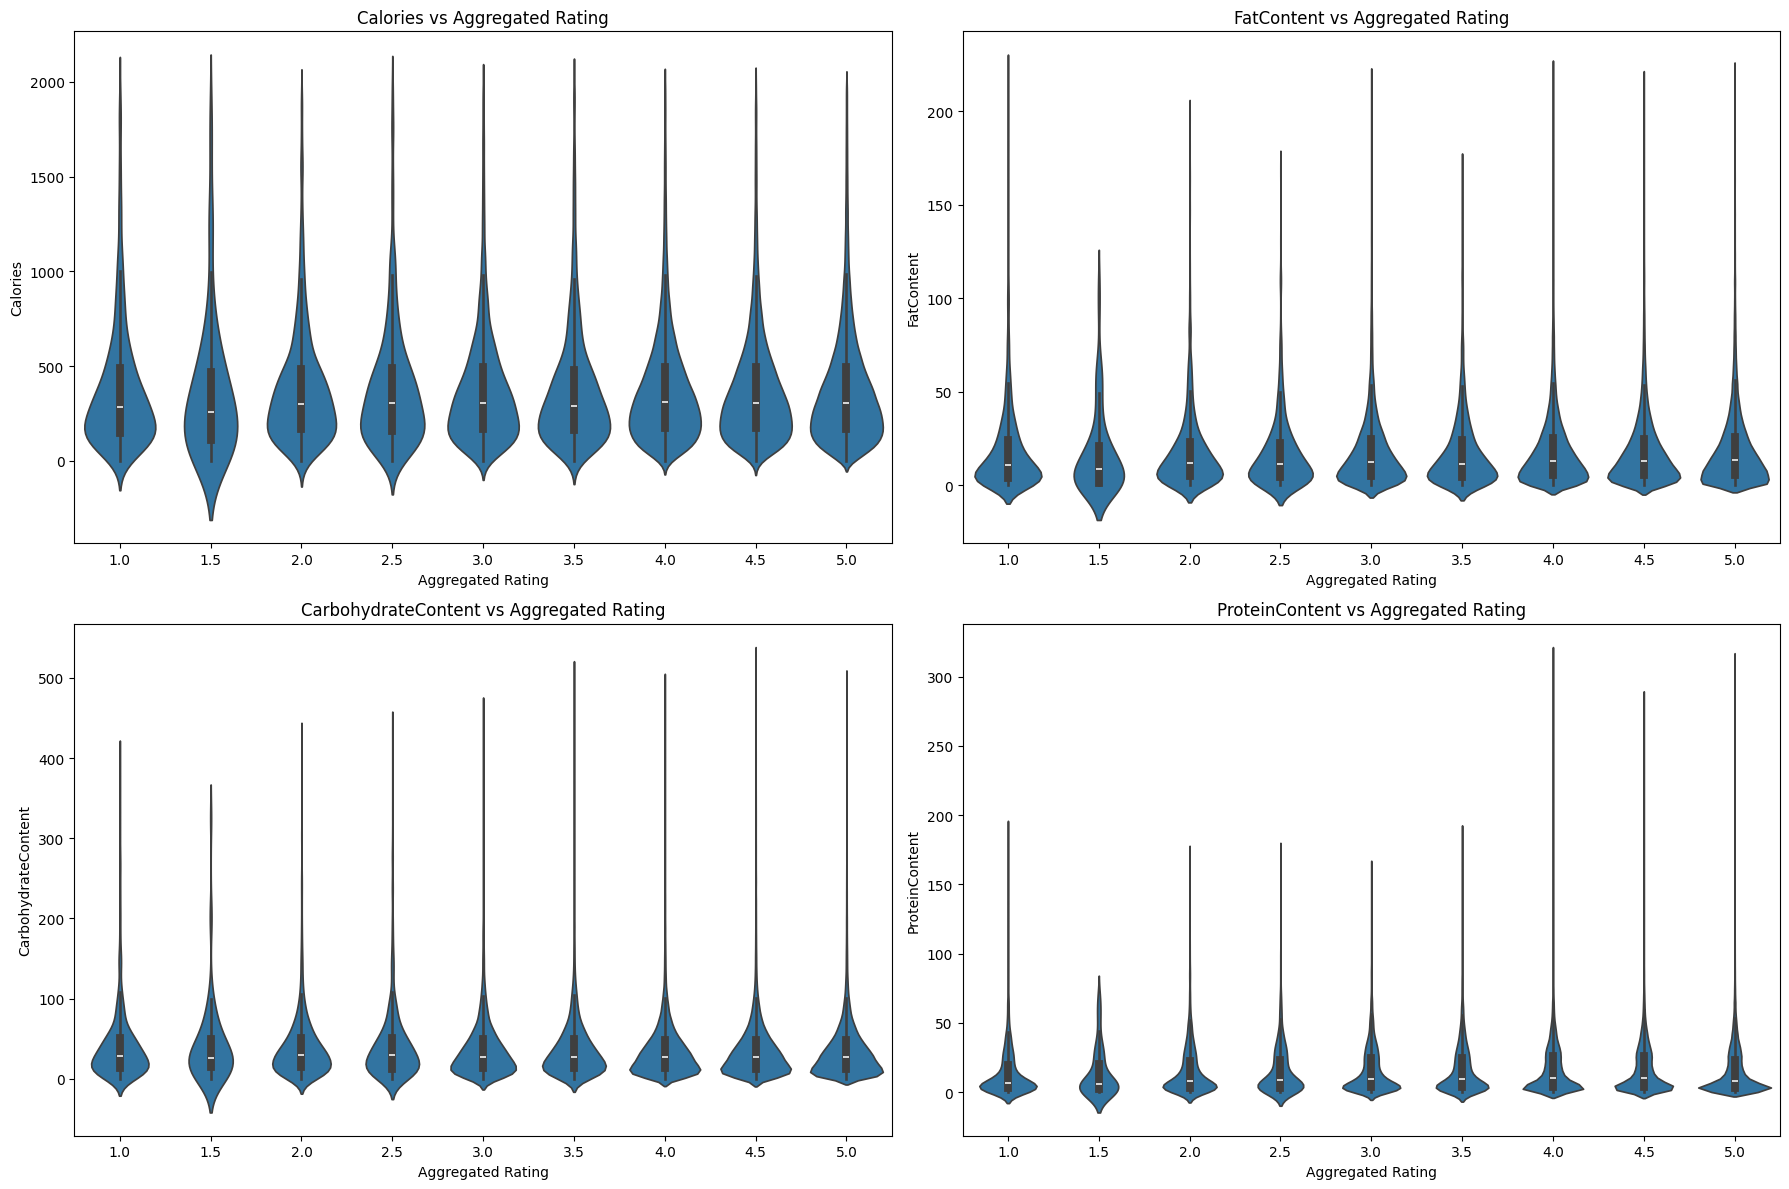

In [ ]:
# Assuming 'filtered_recipes_2000' DataFrame already exists
# Filter out NaN or missing values
filtered_recipes_2000 = filtered_recipes_2000.dropna(subset=['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'AggregatedRating'])

# List of variables to plot against AggregatedRating
variables = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent']

# Create the figure and axes for a grid of violin plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, variable in zip(axes, variables):
    sns.violinplot(x=filtered_recipes_2000['AggregatedRating'], y=filtered_recipes_2000[variable], ax=ax)
    ax.set_xlabel('Aggregated Rating')
    ax.set_ylabel(variable)
    ax.set_title(f'{variable} vs Aggregated Rating')

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
filtered_recipes_1000 = recipes[recipes['Calories'] < 500]


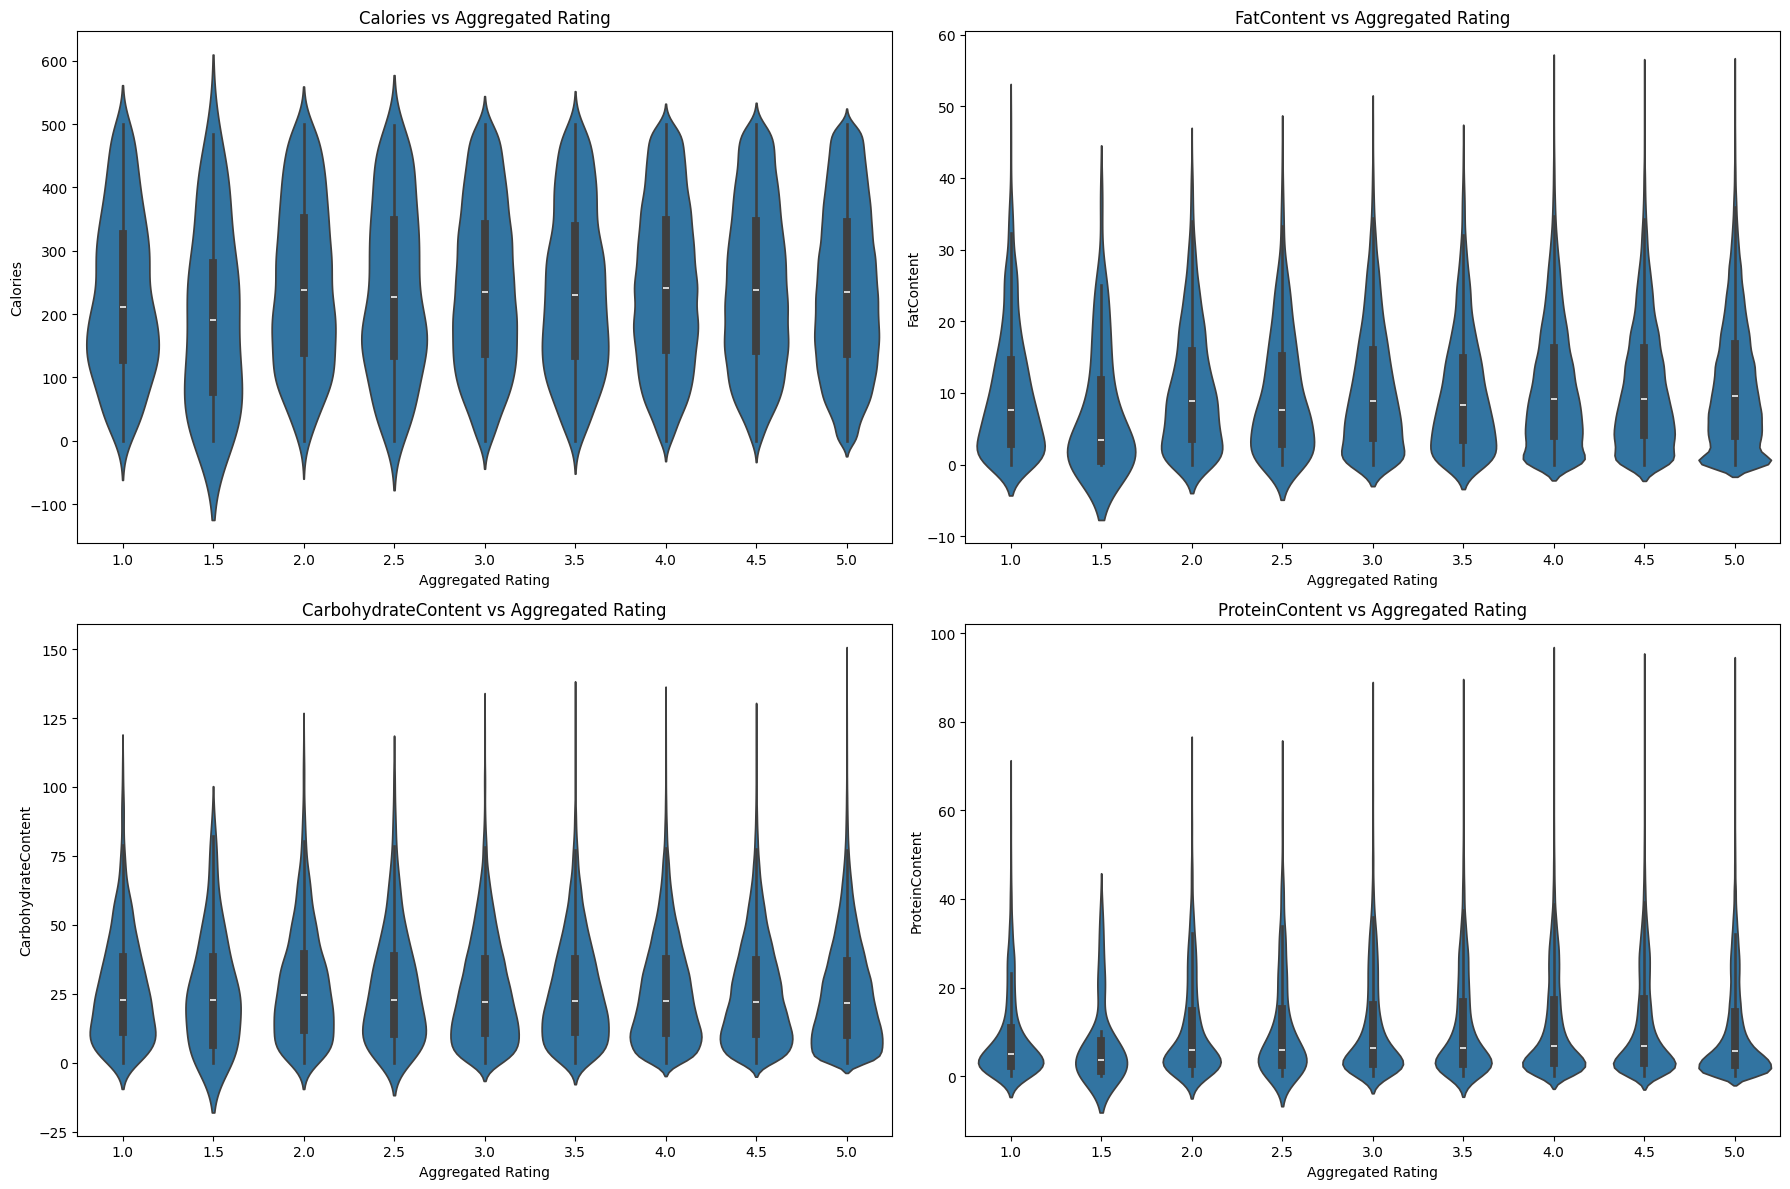

In [ ]:
# Assuming 'filtered_recipes_2000' DataFrame already exists
# Filter out NaN or missing values
filtered_recipes_1000 = filtered_recipes_1000.dropna(subset=['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'AggregatedRating'])

# List of variables to plot against AggregatedRating
variables = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent']

# Create the figure and axes for a grid of violin plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, variable in zip(axes, variables):
    sns.violinplot(x=filtered_recipes_1000['AggregatedRating'], y=filtered_recipes_1000[variable], ax=ax)
    #ax.set_yscale('log')
    ax.set_xlabel('Aggregated Rating')
    ax.set_ylabel(variable)
    ax.set_title(f'{variable} vs Aggregated Rating')

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/wp/m7tpmys11jlgtsty1hm_349r0000gn/T/ipykernel_77561/3035947558.py:27: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='CalorieRange', y='AggregatedRating', data=filtered_data, scale='width', inner='quartile')


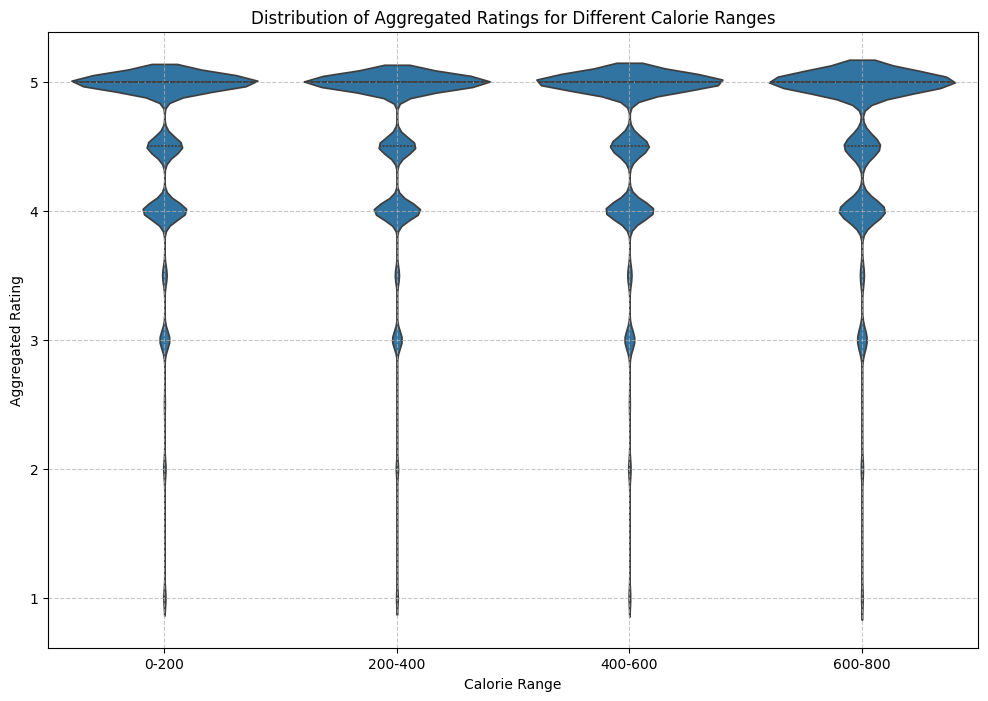

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_recipes_2000' DataFrame already exists
# Convert string "NaN" to actual NaN values
filtered_recipes_2000 = filtered_recipes_2000.replace("NaN", pd.NA)

# Filter out NaN or missing values
filtered_recipes_2000 = filtered_recipes_2000.dropna(subset=['Calories', 'AggregatedRating'])

# Define calorie ranges
calorie_ranges = [(0, 200), (200, 400), (400, 600), (600, 800)]
range_labels = ['0-200', '200-400', '400-600', '600-800']

# Create an empty DataFrame to store the filtered data
filtered_data = pd.DataFrame()

# Filter data for each calorie range and add a 'CalorieRange' column
for label, (low, high) in zip(range_labels, calorie_ranges):
    temp_data = filtered_recipes_2000[(filtered_recipes_2000['Calories'] >= low) & (filtered_recipes_2000['Calories'] < high)].copy()
    temp_data['CalorieRange'] = label
    filtered_data = pd.concat([filtered_data, temp_data])

# Plot violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(x='CalorieRange', y='AggregatedRating', data=filtered_data, scale='width', inner='quartile')
plt.xlabel('Calorie Range')
plt.ylabel('Aggregated Rating')
plt.title('Distribution of Aggregated Ratings for Different Calorie Ranges')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()


# Meal Plan Optimization

In [ ]:
# Assuming 'recipes' DataFrame already exists
# Filter out recipes with Calories < 2000, Calories == 0, and drop rows with NaN values in specified columns
filtered_recipes_2000 = recipes[(recipes['Calories'] < 2000) & (recipes['Calories'] > 0)]
filtered_recipes_2000 = filtered_recipes_2000.dropna(subset=['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'AggregatedRating'])
# Convert RecipeCategory to strings to avoid TypeError
filtered_recipes_2000['RecipeCategory'] = filtered_recipes_2000['RecipeCategory'].astype(str)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import linprog

# Sample 5000 random recipes for testing
sampled_recipes_5000 = filtered_recipes_2000.sample(n=5000, random_state=42)

# Define meal_types and cuisine_types based on unique instances of RecipeCategory
unique_categories = sampled_recipes_5000['RecipeCategory'].unique()
meal_types = unique_categories
cuisine_types = unique_categories

# Feature engineering
sampled_recipes_5000['MealType'] = sampled_recipes_5000['RecipeCategory'].apply(lambda x: next((mt for mt in meal_types if mt in x), 'Other'))
sampled_recipes_5000['Cuisine'] = sampled_recipes_5000['RecipeCategory'].apply(lambda x: next((cu for cu in cuisine_types if cu in x), 'Other'))
sampled_recipes_5000['MainIngredient'], main_ingredient_index = pd.factorize(
    sampled_recipes_5000['RecipeIngredientParts'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')
)

# Convert categorical columns to numerical codes
sampled_recipes_5000['MealType'], meal_type_index = pd.factorize(sampled_recipes_5000['MealType'])
sampled_recipes_5000['Cuisine'], cuisine_index = pd.factorize(sampled_recipes_5000['Cuisine'])

# Split the data
X = sampled_recipes_5000[['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'MealType', 'Cuisine', 'MainIngredient']]
y = sampled_recipes_5000['AggregatedRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define optimization function
def optimize_meal_plan(recipes, model, days=14, meals_per_day=3):
    calorie_range = (1800, 2200)
    carb_range = (203, 358)
    protein_range = (45, 193)
    fat_range = (40, 86)
    
    # Total number of meals to optimize for
    total_meals = days * meals_per_day
    
    # Define constraints for nutritional ranges over 14 days
    A_eq = np.zeros((1, len(recipes)))  # Only one equality constraint for the meal count
    A_eq[0, :] = 1  # Each meal counts as 1 meal
    #print(f"A_eq shape is: {A_eq.shape}")

    b_eq = np.array([total_meals+1])  # Total meals over 14 days
    #print(f"b_eq shape is: {b_eq.shape}")

    # Inequality constraints for nutritional ranges
    A_ub = np.zeros((8, len(recipes)))  # Four constraints for upper bounds and four for lower bounds
    A_ub[0, :] = recipes['Calories'].values
    A_ub[1, :] = recipes['CarbohydrateContent'].values
    A_ub[2, :] = recipes['ProteinContent'].values
    A_ub[3, :] = recipes['FatContent'].values

    # Negative constraints for lower bounds
    A_ub[4, :] = -recipes['Calories'].values
    A_ub[5, :] = -recipes['CarbohydrateContent'].values
    A_ub[6, :] = -recipes['ProteinContent'].values
    A_ub[7, :] = -recipes['FatContent'].values
    
    # Upper and lower bounds for nutritional values over 14 days
    b_ub = np.array([
        (total_meals)*calorie_range[1]/meals_per_day,  # Max calories over 14 days
        (total_meals)*carb_range[1]/meals_per_day,     # Max carbs over 14 days
        (total_meals)*protein_range[1]/meals_per_day,  # Max protein over 14 days
        (total_meals)*fat_range[1]/meals_per_day,      # Max fat over 14 days
        -(total_meals)*calorie_range[0]/meals_per_day,  # Min calories over 14 days (negated for less than constraint)
        -(total_meals)*carb_range[0]/meals_per_day,     # Min carbs over 14 days (negated for less than constraint)
        -(total_meals)*protein_range[0]/meals_per_day,  # Min protein over 14 days (negated for less than constraint)
        -(total_meals)*fat_range[0]/meals_per_day       # Min fat over 14 days (negated for less than constraint)
      
    ])
    #print(f"b_ub shape is: {b_ub.shape}")

    # Objective function to maximize rating
    c = -model.predict(recipes[['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'MealType', 'Cuisine', 'MainIngredient']])
    #print(f"c.shape is {c.shape}")

    # Ensure A_eq, b_eq, A_ub, b_ub, and c match dimensions
    assert A_eq.shape[1] == len(c), "A_eq columns should match the length of c"
    assert A_ub.shape[1] == len(c), "A_ub columns should match the length of c"
    assert len(b_eq) == A_eq.shape[0], "b_eq length should match A_eq rows"
    assert len(b_ub) == A_ub.shape[0], "b_ub length should match A_ub rows"

    # Define bounds for the variables (0 or 1 for each recipe)
    bounds = [(0, 1)] * len(recipes)

    # Solve optimization problem
    result = linprog(c=c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

    if result.success:
        selected_indices = np.where(result.x > 0.5)[0]  # Select recipes with x > 0.5
        optimized_meal_plan = recipes.iloc[selected_indices]

        # Print the results
        print(f"Total number of meals: {len(optimized_meal_plan)-1}")
        print(f"Calories range over 14 days: {calorie_range[0]*days} - {calorie_range[1]*days}")
        print(f"Total Calories in meal plan: {sum(optimized_meal_plan['Calories'])}")
        print(f"Average Rating in meal plan: {sum(optimized_meal_plan['AggregatedRating'])/(total_meals+1)}")

        # Break results into 3 meals per day
        for day in range(days):
            print(f"\nDay {day + 1}:")
            for meal in range(meals_per_day):
                meal_index = day * meals_per_day + meal
                if meal_index < len(optimized_meal_plan):
                    meal_info = optimized_meal_plan.iloc[meal_index]
                    print(f"  Meal {meal + 1}: {meal_info['Name']} - {meal_info['Calories']} cal, {meal_info['FatContent']} g fat, {meal_info['CarbohydrateContent']} g carbs, {meal_info['ProteinContent']} g protein")

        # Print the results to a table
        table = optimized_meal_plan[['Name', 'AggregatedRating', 'Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent']]
        print(table.to_string(index=False))
        
        return optimized_meal_plan
    else:
        print("Optimization failed.")
        return None

# Generate meal plan
meal_plan = optimize_meal_plan(sampled_recipes_5000, model, meals_per_day=3)

if meal_plan is not None:
    print("Optimized Meal Plan for Two Weeks:")
else:
    print("Failed to generate an optimized meal plan.")


Total number of meals: 42
Calories range over 14 days: 25200 - 30800
Total Calories in meal plan: 25415.6
Average Rating in meal plan: 5.0

Day 1:
  Meal 1: Give Me a Dime - 190.1 cal, 11.1 g fat, 10.0 g carbs, 0.6 g protein
  Meal 2: Browned-Butter Glaze - 168.3 cal, 7.9 g fat, 25.2 g carbs, 0.2 g protein
  Meal 3: Rumarita - 80.3 cal, 0.0 g fat, 0.0 g carbs, 0.0 g protein

Day 2:
  Meal 1: Matzo Toffee Brittle - 192.1 cal, 13.1 g fat, 18.6 g carbs, 1.0 g protein
  Meal 2: Pink Lemonade - 57.3 cal, 0.1 g fat, 15.0 g carbs, 0.1 g protein
  Meal 3: Low Carb Faux-Tato/Cauliflower Salad - 142.7 cal, 9.5 g fat, 10.6 g carbs, 5.1 g protein

Day 3:
  Meal 1: Southern Long Island Iced Tea - 153.2 cal, 0.0 g fat, 14.3 g carbs, 0.2 g protein
  Meal 2: Cranberry Raspberry Sauce - 360.0 cal, 0.8 g fat, 92.5 g carbs, 1.5 g protein
  Meal 3: Fabulous Sue's Coconut Bars - 321.2 cal, 17.3 g fat, 39.9 g carbs, 4.9 g protein

Day 4:
  Meal 1: 5 Minute - White Chocolate Hazelnut Pie - 255.6 cal, 17.2 g 

In [ ]:
print(meal_plan['RecipeCategory'])

245279                 Beverages
248478                   Dessert
276914                 Beverages
188287                     Candy
172146                 Beverages
113724               Cauliflower
123307                 Beverages
50448                     Sauces
282471                     Candy
18266                        Pie
267436                 Beverages
130067                      Meat
76819                      Candy
139856                    Breads
41060                       Corn
333914              Drop Cookies
461358    Chocolate Chip Cookies
383239              Lunch/Snacks
151367                 < 15 Mins
316458                    Breads
157490                     Candy
246423       Chicken Thigh & Leg
99891                      Candy
28998                     Sauces
384066                   Spreads
14457                      Beans
206774                   Poultry
255957               Bath/Beauty
101589                   Mexican
211480              Drop Cookies
174731    

In [ ]:
print(len(meal_plan))
print(1800*14)
print(sum(meal_plan['Calories']))
print(2200*14)

# Print the results to a table
table = meal_plan[['Name', 'Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent']]
print(table.to_string(index=False))

43
25200
25415.6
30800
                                                        Name  Calories  FatContent  CarbohydrateContent  ProteinContent
                                              Give Me a Dime     190.1        11.1                 10.0             0.6
                                        Browned-Butter Glaze     168.3         7.9                 25.2             0.2
                                                    Rumarita      80.3         0.0                  0.0             0.0
                                        Matzo Toffee Brittle     192.1        13.1                 18.6             1.0
                                               Pink Lemonade      57.3         0.1                 15.0             0.1
                        Low Carb Faux-Tato/Cauliflower Salad     142.7         9.5                 10.6             5.1
                               Southern Long Island Iced Tea     153.2         0.0                 14.3             0.2
                 

In [ ]:
filtered_recipes_2000 = recipes[recipes['Calories'] < 2000]
filtered_recipes_2000 = filtered_recipes_2000.dropna(subset=['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'AggregatedRating'])

In [ ]:
print(filtered_recipes_2000['Calories'].describe())

count    261996.000000
mean        380.267174
std         307.239327
min           0.000000
25%         169.800000
50%         304.200000
75%         495.325000
max        1999.900000
Name: Calories, dtype: float64
